In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import statsmodels.formula.api as sfa
from progressbar import progressbar
from statsmodels.iolib.summary2 import summary_col
import matplotlib.pyplot as plt

# Exercises

We will be working from this notebook:
[Regression and experiments](https://colab.research.google.com/drive/1mn3iogugMBo02uNSgjFoq3EfbZuqQfPn)

## Part 1

See the notebook section "Reproducing results from a real field experiment" and associated slides.

We are going to elaborate on the results from the Karlan et al. study.

1. Print out the full set of regression results from the tops of column 3 and column 4 in the results table. You can just use the `summary()` method on the regression results to print these. These are the two models already fitted in the notebook.

2. Which one has more control variables? Which one has a higher R-squared? R-squared is the proportion of variance in $Y$ explained by the model. Which one has a smaller standard error on the estimated ATE?

3. Let's do a simulation to better understand the results. You can start with the data-generating process in the section "Commentary on the standard errors and covariates" of the notebook. In the section "Modeling the simulated data" I printed out two different models fit to the data (Model 1 and Model 2). How does the regression estimate of the treatment effect in the simulated data compare to the estimate for the effect of `rem_any` in the real experiment results? Look at the estimated coefficient and the standard error. Did we do a reasonably good job of simulating data that resembles the real data?

4. Now we will simulate repeated samples from the data-generating process in the notebook. Set `beta_hs` = 0.35 for your simulations. Simulate B=1000 data samples and fit Model 1 to all 1000 samples. *See the `compare_lpm_prop_test` function in the notebook to get an idea of how you can package the results in a convenient way.

4. Across the simulations, what is the standard deviation of the estimated treatment effects for each of the two models? Make a histogram of the estimated treatment effects. (Hint: Use `.params['d']` on your regression results.)

5. How does your answer in 4 compare to the standard error in your regression output from question 3? *The standard errors in the regression output are estimates of the standard deviation of the sampling distribution of the coefficient estimate!*

6. Across the simulations, what percentage of the confidence intervals include the true ATE in each model? Reference the lecture slides on about the "Confidence interval machine."

## Part 2

See the notebook section "Classic blocking example: Shoe technology experiment". 

1. The baseline "inter-person variability" is set to 5. What are the sampling standard deviations of the estimated ATE (aka standard error) for the non-blocking and blocking design?

2. Blocking reduces the impact of heterogeneity in the data. What is your guess for how the blocking and non-blocking designs will compare when we increase the "inter-person variability"?

3. Make a plot of the standard errors for several different levels of inter-person variability: 0, 1, 5, 10, 20. It can just be a scatter plot or line plot.

4. In terms of the people in our model, generally what does it mean to have inter-person variability = 0? What does it mean when we increase it to a larger number like 20?

5. Now imagine that each person's wear rate is a known function of their weight, strength, and steps per day and we have it (the wear rate) in our data (it is already there!). (Alternative story: We know from the past how fast they wear down their shoes.) Use a regression to estimate the ATE and include the wear rate as a covariate in your model.  (Hint: Use the function `regression_ate`.) Simulate the distrubtion of ATE for a blocked and non-blocked design using the regression estimator. Use "inter-person variability" of 20. How do the standard errors compare now? 

6. That's great but what if we do not have data about each person's wear rate? We can try another strategy. Let's have each person run through 5 pairs of shoes during the experiment. This is easy to change: You just need to add replicates to `df = pd.concat([df_left, df_right], axis=0)`. Then cut the sample to just N=20 people so we use the same number of shoes in total. Run a simulation with inter-person variability of 20 again. Estimate the ATE using a regression with a dummy variable for each person (use `C(i)` in your formula). What is the standard error of the ATE estimate now? Practically, what is the tradeoff of this strategy vs. covariate strategy vs. the blocked strategy?


#Part 1
###1

In [ ]:
rem = pd.read_csv("https://raw.githubusercontent.com/kyleco/kyleco.github.io/master/data/analysis_dataallcountries.csv")
print(rem[['reached_b4goal', 'rem_any']].mean())

reached_b4goal    0.553319
rem_any           0.611578
dtype: float64


In [ ]:
# Set up our variables
randfeature = "highint rewardint joint dc joint_single"
covariates = "female  highschool_completed married inc_7d wealthy hyperbolic spent_b4isaved saved_asmuch missing_female missing_age missing_highschool_completed missing_married missing_saved_asmuch missing_spent_b4isaved"

Xrandfeature = "+".join(randfeature.split())
Xfull = "+".join(randfeature.split() + covariates.split())

# NOTE: In a LPM in Statsmodels the outcome has to be a float!
# It will complain if this is an int!
rem['reached_b4goal'] = rem['reached_b4goal'].astype('float')
rem['female'] = rem['female'].astype('float')



formula_col3 = "reached_b4goal ~ rem_any + {Xs} + C(country)".format(Xs=Xrandfeature)
r_col3 = sfa.ols(formula_col3, data=rem).fit(cov_type='HC1')

formula_col4 = "reached_b4goal ~ rem_any + {Xs} + C(depart) + C(provincia) + C(marketer) + C(branch) + C(country)".format(Xs=Xfull)
r_col4 = sfa.ols(formula_col4, data=rem).fit(cov_type='HC1')




In [ ]:
#r = sfa.ols("y ~ d", data=df).fit(cov_type='HC1')
print('Column 3')
print(r_col3.summary())

Column 3
                            OLS Regression Results                            
Dep. Variable:         reached_b4goal   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     163.4
Date:                Tue, 17 Sep 2019   Prob (F-statistic):          3.20e-264
Time:                        00:16:49   Log-Likelihood:                -9293.0
No. Observations:               13560   AIC:                         1.860e+04
Df Residuals:                   13551   BIC:                         1.867e+04
Df Model:                           8                                         
Covariance Type:                  HC1                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.6628      0

In [ ]:
print('Column 4')
print(r_col4.summary())

Column 4
                            OLS Regression Results                            
Dep. Variable:         reached_b4goal   R-squared:                       0.108
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                 2.496e+04
Date:                Tue, 17 Sep 2019   Prob (F-statistic):               0.00
Time:                        00:16:49   Log-Likelihood:                -8987.8
No. Observations:               13560   AIC:                         1.809e+04
Df Residuals:                   13504   BIC:                         1.851e+04
Df Model:                          55                                         
Covariance Type:                  HC1                                         
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Interce

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 60, but rank is 52
  'rank is %d' % (J, J_), ValueWarning)


###2

In [ ]:
ctrl_var = r_col3.params.count()-r_col4.params.count()
print('The difference in control variables =' , ctrl_var)
if ctrl_var > 0:
  print('Column 3 has more control variables')
elif ctrl_var == 0:
  print('Columns 3 and 4 have the same number of control variables')
else:
  print('Column 4 has more control variables')

The difference in control variables = -52
Column 4 has more control variables


In [ ]:
rsq = r_col3.rsquared - r_col4.rsquared
#print(rsq)
if rsq > 0:
  print('Column 3 has a higher R-squared: ', r_col3.rsquared)
elif rsq == 0:
  print('Column 3 and 4 have the same R-squared', r_col3.rsquared)
else:
  print('Column 4 has a higher R-squared: ', r_col4.rsquared)

Column 4 has a higher R-squared:  0.10819457890249662


In [ ]:
sterror = r_col3.bse.rem_any - r_col4.bse.rem_any
#print(sterror)
if sterror > 0:
  print('Column 4 has a smaller standard error on the estimated ATE: ', r_col4.bse.rem_any)
elif sterror == 0:
  print('Column 3 and 4 have the same standart error on the estimated ATE: ', r_col3.bse.rem_any)
else:
  print('Column 3 has a smaller standard error on the estimated ATE: ', r_col3.bse.rem_any)

Column 4 has a smaller standard error on the estimated ATE:  0.008949743622819572


###3

In [ ]:
# This cell contains the "data-generating process."
# We will make it up, but try to create something close to
# what we saw in the Karlan experiment above.
# That will help us get a better sense of how the regression is behaving.

# Set the same size like the real data.
N = 13560

# Our "control variable" will be an indicator for graduating from high-school.
grad_high_school = np.random.binomial(n=1, p=0.5, size=N)
beta_hs = 0.1


# Set the data-generating process to have on average
# 61% of people in the treatment group, like in the paper.
# Set the ATE to be 0.032, similar to what we see in the real data.
D = np.random.binomial(n=1, p=0.61, size=N)
ATE = 0.032

# Generate the potential outcomes.
# We have to be careful tha the probabilities remain in the valid
# range [0, 1] or else we will get an error.
baseline_probability = 0.25 + beta_hs * grad_high_school
Y0 = np.random.binomial(n=1, p=baseline_probability)
Y1 = np.random.binomial(n=1, p=baseline_probability + ATE * D)

df = pd.DataFrame({
    'grad_high_school': grad_high_school,
    'd': D,
    'y0': Y0,
    'y1': Y1
})
df['y'] = df.eval("y1 * d + y0 * (1 - d)")
print(df.mean())

grad_high_school    0.508038
d                   0.606858
y0                  0.306490
y1                  0.313348
y                   0.320870
dtype: float64


In [ ]:
# This cells fits two different models. 
# One model has the control variable and the other doesn't.

# We call this model a bivariate one
# because it is just a relationship between two variables.
r_sim_biv = sfa.ols("y ~ d", df).fit()

# This model is more complex because it has an additional covariate
# (aka control variable).
r_sim_control = sfa.ols("y ~ d + grad_high_school", df).fit()


info_dict={'R-squared' : lambda x: f"{x.rsquared:0.4f}",
           'No. coefficients': lambda x: f"{x.params.shape[0]}"}

results_table = summary_col(results=[r_sim_biv, r_sim_control],
                            float_format='%0.4f',
                            stars = True,
                            model_names=[
                                'Model 1',
                                'Model 2',
                            ],
                            info_dict=info_dict,
                            regressor_order=['d', 'grad_high_school'],
                            drop_omitted=True)

print(results_table)


                  Model 1   Model 2 
------------------------------------
d                0.0212*** 0.0211***
                 (0.0082)  (0.0082) 
grad_high_school           0.1055***
                           (0.0080) 
R-squared        0.0005    0.0133   
No. coefficients 2         3        
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


In [ ]:
print(r_col3.params.rem_any)
print(r_col4.params.rem_any)
print(r_sim_biv.params.d)
print(r_sim_control.params.d)
print('The difference is in the thousandths of estimates, what means that our estimate is quite accurate') 
print('I suppose we did good job as it was the small difference in standart errors, which starts in the thousandths, so it means that our resembling is precise')

0.03185505049068642
0.03186131518614749
0.021191849815628407
0.021147753295286287
The difference is in the thousandths of estimates, what means that our estimate is quite accurate
I suppose we did good job as it was the small difference in standart errors, which starts in the thousandths, so it means that our resembling is precise


###4

In [ ]:
# Import rpy2 which lets us use R functions in Python.
# This is useful because R has many statistical functions
# that we don't have in Python and these are more likely to
# be written by professional statisticians and be battle-proven.
from rpy2.robjects import IntVector, default_converter
from rpy2.robjects.packages import importr

stats = importr('stats')

def stats_prop_test(e1, e2, n1, n2):
  x = IntVector([e1, e2])
  ns = [n1, n2]
  n = IntVector(ns)
  n_array = np.array([n1, n2])
  
  # Recommended to not use continuity correction for large sample sizes:
  # https://en.wikipedia.org/wiki/Yates%27s_correction_for_continuity
  result = stats.prop_test(x=x, n=n, correct=False)
  z = result.rx('statistic')[0][0] ** 0.5
  r_estimate = result.rx('estimate')[0]
  estimates = np.array([r_estimate[0], r_estimate[1]])
  var = np.array(list(map(lambda p: p * (1 - p), estimates)))
  
  se = np.sqrt(np.divide(var, n_array))
  difference = estimates[1] - estimates[0]
  p_value = result.rx('p.value')[0][0]
  return {
      'estimates': estimates,
      'difference': difference,
      'se': se,
      'difference_se': np.sqrt((se ** 2).sum()),
      'z': z, 
      'p_value': p_value
  }

In [ ]:
# This cell contains the "data-generating process."
# We will make it up, but try to create something close to
# what we saw in the Karlan experiment above.
# That will help us get a better sense of how the regression is behaving.

# Set the same size like the real data.
N = 13560
B = 1000
# Our "control variable" will be an indicator for graduating from high-school.
grad_high_school = np.random.binomial(n=1, p=0.5, size=N)
beta_hs = 0.35


# Set the data-generating process to have on average
# 61% of people in the treatment group, like in the paper.
# Set the ATE to be 0.032, similar to what we see in the real data.
D = np.random.binomial(n=1, p=0.61, size=N)
ATE = 0.032

# Generate the potential outcomes.
# We have to be careful tha the probabilities remain in the valid
# range [0, 1] or else we will get an error.
baseline_probability = 0.25 + beta_hs * grad_high_school
Y0 = np.random.binomial(n=1, p=baseline_probability)
Y1 = np.random.binomial(n=1, p=baseline_probability + ATE * D)

df = pd.DataFrame({
    'grad_high_school': grad_high_school,
    'd': D,
    'y0': Y0,
    'y1': Y1
})
df['y'] = df.eval("y1 * d + y0 * (1 - d)")
print(df.mean())
#print(df['y0'].count())
#df

grad_high_school    0.497935
d                   0.610472
y0                  0.413938
y1                  0.445723
y                   0.441814
dtype: float64


In [ ]:

def compare_lpm_prop_test(
  N = 10000,
  P_Y0 = 0.35,
  ATE = 0.02,
  P_treatment = 0.5
):
  params = locals().copy()
  
  #treatment_units = np.random.choice(units, int(len(units) * share_treatment), replace=False)
  #df = pd.DataFrame({'i': units})
  ## Set the treatment units to have d_i = 1
  #df['d'] = df['i'].isin(treatment_units).astype('float')
  Y0 = np.random.binomial(n=1, p=P_Y0, size=N)
  Y1 = np.random.binomial(n=1, p=P_Y0 + ATE, size=N)
  D = np.random.binomial(n=1, p=P_treatment, size=N)

  units = np.arange(0, N)
  df = pd.DataFrame({
      'i': units,
      'y0': Y0,
      'y1': Y1,
  })
  treatment_units = np.random.choice(units, int(len(units) * P_treatment), replace=False)
  df['d'] = df['i'].isin(treatment_units).astype('float')
  df['y'] = df.eval("y1 * d + y0 * (1 - d)")

  # Get regression results
  result_reg = sfa.ols("y ~ d", data=df).fit(cov_type='HC1')
  #result_reg = sfa.ols("y ~ d", data=df).fit()

  # Get prop_test results
  result_prop_test = stats_prop_test(
      df.query("d==0")['y'].sum(),
      df.query("d==1")['y'].sum(),
      df.query("d==0")['y'].count(),
      df.query("d==1")['y'].count(),
  )
  diffs = {
      'difference': (result_reg.params['d'] - result_prop_test['difference']),
      'se': (result_reg.bse['d'] - result_prop_test['difference_se']),
      'p': (result_reg.pvalues['d'] - result_prop_test['p_value'])
  }
  diffs.update(params)
  return diffs



In [ ]:
# This cell contains the "data-generating process."
# We will make it up, but try to create something close to
# what we saw in the Karlan experiment above.
# That will help us get a better sense of how the regression is behaving.

# Set the same size like the real data.
N = 13560
B = 1000
# Our "control variable" will be an indicator for graduating from high-school.
grad_high_school = np.random.binomial(n=1, p=0.5, size=N)
beta_hs = 0.35


# Set the data-generating process to have on average
# 61% of people in the treatment group, like in the paper.
# Set the ATE to be 0.032, similar to what we see in the real data.
D = np.random.binomial(n=1, p=0.61, size=N)
ATE = 0.032

# Generate the potential outcomes.
# We have to be careful tha the probabilities remain in the valid
# range [0, 1] or else we will get an error.
baseline_probability = 0.25 + beta_hs * grad_high_school
Y0 = np.random.binomial(n=1, p=baseline_probability)
Y1 = np.random.binomial(n=1, p=baseline_probability + ATE * D)

df = pd.DataFrame({
    'grad_high_school': grad_high_school,
    'd': D,
    'y0': Y0,
    'y1': Y1
})
df['y'] = df.eval("y1 * d + y0 * (1 - d)")
print(df.mean())

grad_high_school    0.495944
d                   0.607965
y0                  0.425074
y1                  0.441962
y                   0.439897
dtype: float64


In [ ]:
def newfunction(
  N = 10000,
  beta_hs = 0.35,
  ATE = 0.032
):
  grad_high_school = np.random.binomial(n=1, p=0.5, size=N)
  D = np.random.binomial(n=1, p=0.61, size=N)
  baseline_probability = 0.25 + beta_hs * grad_high_school
  Y0 = np.random.binomial(n=1, p=baseline_probability)
  Y1 = np.random.binomial(n=1, p=baseline_probability + ATE * D)
  dff = pd.DataFrame({
    'grad_high_school': grad_high_school,
    'd': D,
    'y0': Y0,
    'y1': Y1
  })
  dff['y'] = dff.eval("y1 * d + y0 * (1 - d)")
  regr = sfa.ols("y ~ d", dff).fit()
  a = regr.params['d']
  return a

In [ ]:
B = 1000
ch = pd.DataFrame([newfunction() for i in np.arange(0, B)])

###5

Text(0.5, 1.0, 'Model 1')

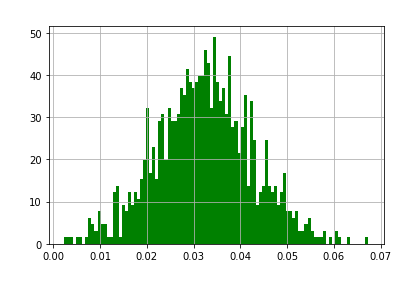

In [ ]:
ch.hist(bins = 100, density = True, color = 'green')
plt.xlabel("Estimations", fontsize=18, color = 'white')
plt.ylabel("Density", fontsize = 18, color = 'white')
plt.title("Model 1", color='white', fontsize = 18)

In [ ]:
def newfunction1(
  N = 10000,
  beta_hs = 0.35,
  ATE = 0.032
):
  grad_high_school = np.random.binomial(n=1, p=0.5, size=N)
  D = np.random.binomial(n=1, p=0.61, size=N)
  baseline_probability = 0.25 + beta_hs * grad_high_school
  Y0 = np.random.binomial(n=1, p=baseline_probability)
  Y1 = np.random.binomial(n=1, p=baseline_probability + ATE * D)
  dfff = pd.DataFrame({
    'grad_high_school': grad_high_school,
    'd': D,
    'y0': Y0,
    'y1': Y1
  })
  dfff['y'] = dfff.eval("y1 * d + y0 * (1 - d)")
  regr1 = sfa.ols("y ~ d + grad_high_school", dfff).fit()
  a1 = regr1.params['d']
  return a1

In [ ]:
B = 1000
ch1 = pd.DataFrame([newfunction1() for i in np.arange(0, B)])

Text(0.5, 1.0, 'Model 2')

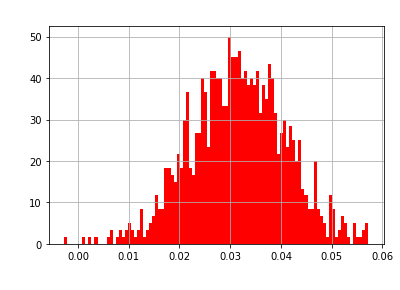

In [ ]:
ch1.hist(bins = 100, density = True, color = 'red')
plt.xlabel("Estimations", fontsize=18, color = 'white')
plt.ylabel("Density", fontsize = 18, color = 'white')
plt.title("Model 2", color='white', fontsize = 18)

In [ ]:
print(ch.std())
print(ch1.std())

0    0.010281
dtype: float64
0    0.009372
dtype: float64


##7

In [ ]:
print(ch.mean())
print(ch1.mean())

0    0.032243
dtype: float64
0    0.031589
dtype: float64


In [ ]:
# t = 1.962 for 0.025 and sample = 1000
#Xmean +- t*std/sqrt(B)
t = 1.962
lboard1 = 0.032221 - t*(0.01011/B ** (1/2))
rboard1 = 0.032221 + t*(0.01011/B ** (1/2))
lboard2 = 0.031716 - t *(0.009199/B **(1/2))
rboard2 = 0.031716 + t *(0.009199/B **(1/2))
print('Left board of confidence lever for model 1 = ', lboard1)
print('Right board of confidence lever for model 1 = ', rboard1)
print('Left board of confidence lever for model 2 = ', lboard2)
print('Right board of confidence lever for model 2 = ', rboard2)

Left board of confidence lever for model 1 =  0.03159373629542879
Right board of confidence lever for model 1 =  0.03284826370457121
Left board of confidence lever for model 2 =  0.03114525827711666
Right board of confidence lever for model 2 =  0.032286741722883344


In [ ]:
k = 0
for i in np.arange(0, B):
  if ch[0][i] >= lboard1 and ch[0][i] <= rboard1:
    k = k+1
  else:
    k = k + 0

In [ ]:
k

53

In [ ]:
ch[0]

0      0.040130
1      0.020608
2      0.019745
3      0.051375
4      0.031495
5      0.022215
6      0.026746
7      0.046226
8      0.021234
9      0.025387
10     0.029256
11     0.018614
12     0.036813
13     0.045206
14     0.038201
15     0.032804
16     0.025176
17     0.042958
18     0.046865
19     0.036923
20     0.040824
21     0.027418
22     0.022904
23     0.038060
24     0.036434
25     0.029474
26     0.045262
27     0.023938
28     0.029140
29     0.040884
         ...   
970    0.056639
971    0.030024
972    0.030305
973    0.030478
974    0.047668
975    0.034680
976    0.047340
977    0.045719
978    0.030737
979    0.022694
980    0.029091
981    0.042681
982    0.034201
983    0.047140
984    0.023857
985    0.020348
986    0.011023
987    0.028536
988    0.042532
989    0.036781
990    0.027116
991    0.032984
992    0.023351
993    0.033162
994    0.039878
995    0.025482
996    0.029432
997    0.044094
998    0.034535
999    0.027392
Name: 0, Length: 1000, d

#Part 2
##1

In [ ]:
#PART2
def gen_shoe_data(N, block=False, person_variability=5):

  # Make N people each with their own randomly wear rate in [0, person_variability].
  people = np.arange(0, N)
  r_person = np.random.uniform(0, person_variability, size=N)
  
  # Make left and right feet
  df_left = pd.DataFrame({'i': people})
  df_left['left_foot'] = 1
  df_right = pd.DataFrame({'i': people})
  df_right['left_foot'] = 0 
  df = pd.concat([df_left, df_right], axis=0)
  df['shoe'] = np.arange(0, df.shape[0])
  
  # Each of the person's feet will have the same Y0 (success probability)
  df['r_y0'] = r_person[df['i']]
  
  # Treatment reduces wear rate by 0.20
  ATE = -0.20
  # Y outcomes are measures of shoe wear
  Y0 = np.random.normal(loc=df['r_y0'])
  Y1 = np.random.normal(loc=df['r_y0'] + ATE)
  df['y0'] = Y0
  df['y1'] = Y1
  
  P_treatment = 0.5
  if block == False:
    treatment_shoes = np.random.choice(df['shoe'], int(len(df['shoe']) * P_treatment), replace=False)
    df['d'] = df['shoe'].isin(treatment_shoes).astype('float')
  else:
    # Treat left foot only
    # In real life we would treat a random foot.
    # Wouldn't do this in real life but it doesn't matter for the simulation.
    df['d'] = df['left_foot']
         
  df['y'] = df.eval("y1 * d + y0 * (1 - d)")
  del df['y0']
  del df['y1']
  return df

def estimate_ate(df):
  means = df.groupby('d')['y'].mean()
  return {'estimated_ate': means[1] - means[0]}


def regression_ate(df, formula="y ~ d + r_y0"):
  r = sfa.ols(formula, df).fit()
  return {
      'estimated_ate': r.params['d'],
      'estimated_ate_se': r.bse['d']
  }

In [ ]:
# Generate simulated data sets without blocking and with blocking
B = 500
inter_person_variability = 5
# Generate simulated data sets without blocking and with blocking
noblock = [gen_shoe_data(100, False, inter_person_variability) for _ in progressbar(np.arange(0, B))]
block = [gen_shoe_data(100, True, inter_person_variability) for _ in progressbar(np.arange(0, B))]
# Estimate the ATE of each data set
m_noblock = pd.DataFrame([estimate_ate(d) for d in progressbar(noblock)])
m_block = pd.DataFrame([estimate_ate(d) for d in progressbar(block)])
# Show results
results = pd.concat([
    m_noblock['estimated_ate'].describe(),
    m_block['estimated_ate'].describe()
], axis=1)
results.columns = ['noblock', 'block']
results

100% (500 of 500) |######################| Elapsed Time: 0:00:06 Time:  0:00:06
100% (500 of 500) |######################| Elapsed Time: 0:00:06 Time:  0:00:06
100% (500 of 500) |######################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (500 of 500) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


,noblock,block
count,500.000000,500.000000
mean,-0.183512,-0.194685
std,0.237137,0.138139
min,-0.946871,-0.672352
25%,-0.346674,-0.286918
50%,-0.188150,-0.195359
75%,-0.028566,-0.110695
max,0.615650,0.183850


In [ ]:
pd.DataFrame([estimate_ate(d) for d in progressbar(block)]).std()

100% (500 of 500) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


estimated_ate    0.138139
dtype: float64

In [ ]:
pd.DataFrame([estimate_ate(d) for d in progressbar(noblock)]).std()

100% (500 of 500) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


estimated_ate    0.237137
dtype: float64

##2

In [ ]:
#Example

In [ ]:
# Generate simulated data sets without blocking and with blocking
B = 500
inter_person_variability = 10
# Generate simulated data sets without blocking and with blocking
noblock = [gen_shoe_data(100, False, inter_person_variability) for _ in progressbar(np.arange(0, B))]
block = [gen_shoe_data(100, True, inter_person_variability) for _ in progressbar(np.arange(0, B))]
# Estimate the ATE of each data set
m_noblock = pd.DataFrame([estimate_ate(d) for d in progressbar(noblock)])
m_block = pd.DataFrame([estimate_ate(d) for d in progressbar(block)])
# Show results
results = pd.concat([
    m_noblock['estimated_ate'].describe(),
    m_block['estimated_ate'].describe()
], axis=1)
results.columns = ['noblock', 'block']
results

100% (500 of 500) |######################| Elapsed Time: 0:00:06 Time:  0:00:06
100% (500 of 500) |######################| Elapsed Time: 0:00:06 Time:  0:00:06
100% (500 of 500) |######################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (500 of 500) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


,noblock,block
count,500.000000,500.000000
mean,-0.201659,-0.201073
std,0.446926,0.138649
min,-1.411697,-0.590392
25%,-0.510755,-0.296850
50%,-0.223469,-0.200241
75%,0.099847,-0.100319
max,1.356847,0.240880


In [ ]:
pd.DataFrame([estimate_ate(d) for d in progressbar(noblock)]).std()

100% (500 of 500) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


estimated_ate    0.446926
dtype: float64

In [ ]:
pd.DataFrame([estimate_ate(d) for d in progressbar(block)]).std()

100% (500 of 500) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


estimated_ate    0.138649
dtype: float64

In [ ]:
#ANSWER:
#If we increase inter-person variability, the standard deviations of the estimated ATE will increase too
#So if blocking reduces he impact of heterogeneity in the data, concsequently, using non-blocking concept will be more dependent on changing heterogeneity
#Particularly, increasing inter-person variability will lead to higher standard deviations of the estimated ATE

##3

In [ ]:
B = 500
inter_person_variability = 0
# Generate simulated data sets without blocking and with blocking
noblock = [gen_shoe_data(100, False, inter_person_variability) for _ in progressbar(np.arange(0, B))]
block = [gen_shoe_data(100, True, inter_person_variability) for _ in progressbar(np.arange(0, B))]
# Estimate the ATE of each data set
m_noblock = pd.DataFrame([estimate_ate(d) for d in progressbar(noblock)])
m_block = pd.DataFrame([estimate_ate(d) for d in progressbar(block)])
# Show results
results = pd.concat([
    m_noblock['estimated_ate'].describe(),
    m_block['estimated_ate'].describe()
], axis=1)
results.columns = ['noblock', 'block']
results

100% (500 of 500) |######################| Elapsed Time: 0:00:06 Time:  0:00:06
100% (500 of 500) |######################| Elapsed Time: 0:00:06 Time:  0:00:06
100% (500 of 500) |######################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (500 of 500) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


,noblock,block
count,500.000000,500.000000
mean,-0.201100,-0.198839
std,0.143413,0.150343
min,-0.623710,-0.638253
25%,-0.294631,-0.303390
50%,-0.199022,-0.191972
75%,-0.106248,-0.093865
max,0.248959,0.236294


In [ ]:
a1 = float(pd.DataFrame([estimate_ate(d) for d in progressbar(block)]).std())

100% (500 of 500) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


In [ ]:
a2 = float(pd.DataFrame([estimate_ate(d) for d in progressbar(noblock)]).std())

100% (500 of 500) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


In [ ]:
inter_person_variability = 1
noblock = [gen_shoe_data(100, False, inter_person_variability) for _ in progressbar(np.arange(0, B))]
block = [gen_shoe_data(100, True, inter_person_variability) for _ in progressbar(np.arange(0, B))]
m_noblock = pd.DataFrame([estimate_ate(d) for d in progressbar(noblock)])
m_block = pd.DataFrame([estimate_ate(d) for d in progressbar(block)])

100% (500 of 500) |######################| Elapsed Time: 0:00:06 Time:  0:00:06
100% (500 of 500) |######################| Elapsed Time: 0:00:06 Time:  0:00:06
100% (500 of 500) |######################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (500 of 500) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


In [ ]:
b1 = float(pd.DataFrame([estimate_ate(d) for d in progressbar(noblock)]).std())

100% (500 of 500) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


In [ ]:
b2 = float(pd.DataFrame([estimate_ate(d) for d in progressbar(block)]).std())

100% (500 of 500) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


In [ ]:
inter_person_variability = 5
noblock = [gen_shoe_data(100, False, inter_person_variability) for _ in progressbar(np.arange(0, B))]
block = [gen_shoe_data(100, True, inter_person_variability) for _ in progressbar(np.arange(0, B))]
m_noblock = pd.DataFrame([estimate_ate(d) for d in progressbar(noblock)])
m_block = pd.DataFrame([estimate_ate(d) for d in progressbar(block)])

100% (500 of 500) |######################| Elapsed Time: 0:00:06 Time:  0:00:06
100% (500 of 500) |######################| Elapsed Time: 0:00:06 Time:  0:00:06
100% (500 of 500) |######################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (500 of 500) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


In [ ]:
c1 = float(pd.DataFrame([estimate_ate(d) for d in progressbar(noblock)]).std())

100% (500 of 500) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


In [ ]:
c2 = float(pd.DataFrame([estimate_ate(d) for d in progressbar(block)]).std())

100% (500 of 500) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


In [ ]:
inter_person_variability = 10
noblock = [gen_shoe_data(100, False, inter_person_variability) for _ in progressbar(np.arange(0, B))]
block = [gen_shoe_data(100, True, inter_person_variability) for _ in progressbar(np.arange(0, B))]
m_noblock = pd.DataFrame([estimate_ate(d) for d in progressbar(noblock)])
m_block = pd.DataFrame([estimate_ate(d) for d in progressbar(block)])

100% (500 of 500) |######################| Elapsed Time: 0:00:06 Time:  0:00:06
100% (500 of 500) |######################| Elapsed Time: 0:00:06 Time:  0:00:06
100% (500 of 500) |######################| Elapsed Time: 0:00:01 Time:  0:00:01
100% (500 of 500) |######################| Elapsed Time: 0:00:01 Time:  0:00:01


In [ ]:
d1 = float(pd.DataFrame([estimate_ate(d) for d in progressbar(noblock)]).std())

100% (500 of 500) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


In [ ]:
d2 = float(pd.DataFrame([estimate_ate(d) for d in progressbar(block)]).std())

100% (500 of 500) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


In [ ]:
inter_person_variability = 20
noblock = [gen_shoe_data(100, False, inter_person_variability) for _ in progressbar(np.arange(0, B))]
block = [gen_shoe_data(100, True, inter_person_variability) for _ in progressbar(np.arange(0, B))]
m_noblock = pd.DataFrame([estimate_ate(d) for d in progressbar(noblock)])
m_block = pd.DataFrame([estimate_ate(d) for d in progressbar(block)])

100% (500 of 500) |######################| Elapsed Time: 0:00:06 Time:  0:00:06
100% (500 of 500) |######################| Elapsed Time: 0:00:05 Time:  0:00:05
100% (500 of 500) |######################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (500 of 500) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


In [ ]:
e1 = float(pd.DataFrame([estimate_ate(d) for d in progressbar(noblock)]).std())

100% (500 of 500) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


In [ ]:
e2 = float(pd.DataFrame([estimate_ate(d) for d in progressbar(block)]).std())

100% (500 of 500) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


In [ ]:
d = {'inter_person_variability' : [0,1,5,10,20], 'Block_std': [a1, b2, c2, d2, e2], 'Noblock_std': [a2, b1, c1, d1, e1] }
df = pd.DataFrame(data = d)
df

,inter_person_variability,Block_std,Noblock_std
0,0,0.150343,0.143413
1,1,0.141228,0.147107
2,5,0.145297,0.249865
3,10,0.137517,0.454819
4,20,0.135753,0.785854


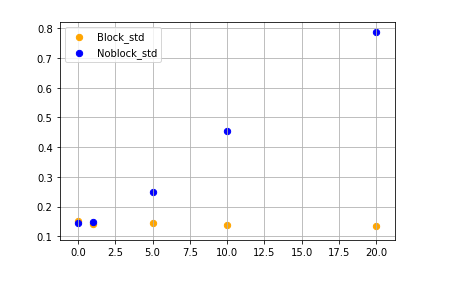

In [ ]:
plt.scatter(df['inter_person_variability'], df['Block_std'], color='orange', s=40, marker='o')
plt.scatter(df['inter_person_variability'], df['Noblock_std'], color='blue', s=40, marker='o')
plt.xlabel("Inter-Person Variability", fontsize=18, color = 'white')
plt.ylabel("Standart Errors", fontsize = 18, color = 'white')
plt.title("The standard errors for several different levels of inter-person variability", color='white', fontsize = 12)
plt.legend()
plt.grid(True)

##4

In [ ]:
#ANSWER:
#Inter person variability shows human changeability in choices.
#In other words, Inter person variability = 0 => homogeneity concept
#Inter person variability = 20 => heterogeneity concept

##5

In [ ]:
# This cell contains the "data-generating process."
# We will make it up, but try to create something close to
# what we saw in the Karlan experiment above.
# That will help us get a better sense of how the regression is behaving.

# Set the same size like the real data.
N = 13560

# Our "control variable" will be an indicator for graduating from high-school.
grad_high_school = np.random.binomial(n=1, p=0.5, size=N)
beta_hs = 0.1


# Set the data-generating process to have on average
# 61% of people in the treatment group, like in the paper.
# Set the ATE to be 0.032, similar to what we see in the real data.
D = np.random.binomial(n=1, p=0.61, size=N)
ATE = 0.032

# Generate the potential outcomes.
# We have to be careful tha the probabilities remain in the valid
# range [0, 1] or else we will get an error.
baseline_probability = 0.25 + beta_hs * grad_high_school
Y0 = np.random.binomial(n=1, p=baseline_probability)
Y1 = np.random.binomial(n=1, p=baseline_probability + ATE * D)

df = pd.DataFrame({
    'grad_high_school': grad_high_school,
    'd': D,
    'y0': Y0,
    'y1': Y1
})
df['y'] = df.eval("y1 * d + y0 * (1 - d)")
print(df.mean())

grad_high_school    0.502434
d                   0.610914
y0                  0.304204
y1                  0.325516
y                   0.329941
dtype: float64


In [ ]:
def gen_shoe_data(N, block=False, person_variability=5):

  # Make N people each with their own randomly wear rate in [0, person_variability].
  people = np.arange(0, N)
  r_person = np.random.uniform(0, person_variability, size=N)
  
  # Make left and right feet
  df_left = pd.DataFrame({'i': people})
  df_left['left_foot'] = 1
  df_right = pd.DataFrame({'i': people})
  df_right['left_foot'] = 0 
  df = pd.concat([df_left, df_right], axis=0)
  df['shoe'] = np.arange(0, df.shape[0])
  
  # Each of the person's feet will have the same Y0 (success probability)
  df['r_y0'] = r_person[df['i']]
  
  # Treatment reduces wear rate by 0.20
  ATE = -0.20
  # Y outcomes are measures of shoe wear
  Y0 = np.random.normal(loc=df['r_y0'])
  Y1 = np.random.normal(loc=df['r_y0'] + ATE)
  df['y0'] = Y0
  df['y1'] = Y1
  
  P_treatment = 0.5
  if block == False:
    treatment_shoes = np.random.choice(df['shoe'], int(len(df['shoe']) * P_treatment), replace=False)
    df['d'] = df['shoe'].isin(treatment_shoes).astype('float')
  else:
    # Treat left foot only
    # In real life we would treat a random foot.
    # Wouldn't do this in real life but it doesn't matter for the simulation.
    df['d'] = df['left_foot']
         
  df['y'] = df.eval("y1 * d + y0 * (1 - d)")
  del df['y0']
  del df['y1']
  return df

def estimate_ate(df):
  means = df.groupby('d')['y'].mean()
  return {'estimated_ate': means[1] - means[0]}


def regression_ate(df, formula="y ~ d + r_y0"):
  r = sfa.ols(formula, df).fit()
  return {
      'estimated_ate': r.params['d'],
      'estimated_ate_se': r.bse['d']
  }

In [ ]:
# Generate simulated data sets without blocking and with blocking
B = 500
inter_person_variability = 5
# Generate simulated data sets without blocking and with blocking
noblock = [gen_shoe_data(100, False, inter_person_variability) for _ in progressbar(np.arange(0, B))]
block = [gen_shoe_data(100, True, inter_person_variability) for _ in progressbar(np.arange(0, B))]
# Estimate the ATE of each data set
m_noblock = pd.DataFrame([estimate_ate(d) for d in progressbar(noblock)])
m_block = pd.DataFrame([estimate_ate(d) for d in progressbar(block)])
# Show results
results = pd.concat([
    m_noblock['estimated_ate'].describe(),
    m_block['estimated_ate'].describe()
], axis=1)
results.columns = ['noblock', 'block']
results

100% (500 of 500) |######################| Elapsed Time: 0:00:06 Time:  0:00:06
100% (500 of 500) |######################| Elapsed Time: 0:00:05 Time:  0:00:05
100% (500 of 500) |######################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (500 of 500) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


,noblock,block
count,500.000000,500.000000
mean,-0.224168,-0.207264
std,0.251069,0.141091
min,-1.030026,-0.675137
25%,-0.368359,-0.300423
50%,-0.232849,-0.202621
75%,-0.063739,-0.113024
max,0.471464,0.227972


In [ ]:
print(sfa.ols("y ~ d + r_y0", block[0]).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     188.7
Date:                Tue, 17 Sep 2019   Prob (F-statistic):           1.69e-46
Time:                        00:20:28   Log-Likelihood:                -283.57
No. Observations:                 200   AIC:                             573.1
Df Residuals:                     197   BIC:                             583.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0901      0.161      0.560      0.5

In [ ]:
print(sfa.ols("r_y0 ~ d", noblock[1]).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                   r_y0   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9664
Date:                Tue, 17 Sep 2019   Prob (F-statistic):              0.327
Time:                        00:20:28   Log-Likelihood:                -361.58
No. Observations:                 200   AIC:                             727.2
Df Residuals:                     198   BIC:                             733.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7729      0.148     18.700      0.0

In [ ]:
m_noblock = pd.DataFrame([regression_ate(d, "y~d+r_y0") for d in progressbar(noblock)])
m_noblock.describe()

100% (500 of 500) |######################| Elapsed Time: 0:00:07 Time:  0:00:07


,estimated_ate,estimated_ate_se
count,500.000000,500.000000
mean,-0.212548,0.141666
std,0.146562,0.007438
min,-0.630368,0.124440
25%,-0.312459,0.136398
50%,-0.210271,0.141468
75%,-0.108733,0.147090
max,0.195095,0.162388


In [ ]:
m_block = pd.DataFrame([regression_ate(d, "y~d+r_y0") for d in progressbar(block)])
m_block.describe()

100% (500 of 500) |######################| Elapsed Time: 0:00:07 Time:  0:00:07


,estimated_ate,estimated_ate_se
count,500.000000,500.000000
mean,-0.207264,0.141537
std,0.141091,0.007115
min,-0.675137,0.119573
25%,-0.300423,0.136911
50%,-0.202621,0.141598
75%,-0.113024,0.146181
max,0.227972,0.161244


In [ ]:
B = 500
inter_person_variability = 20
# Generate simulated data sets without blocking and with blocking
noblock1 = [gen_shoe_data(100, False, inter_person_variability) for _ in progressbar(np.arange(0, B))]
block1 = [gen_shoe_data(100, True, inter_person_variability) for _ in progressbar(np.arange(0, B))]
# Estimate the ATE of each data set
m_noblock1 = pd.DataFrame([estimate_ate(d) for d in progressbar(noblock1)])
m_block1 = pd.DataFrame([estimate_ate(d) for d in progressbar(block1)])
# Show results
results = pd.concat([
    m_noblock1['estimated_ate'].describe(),
    m_block1['estimated_ate'].describe()
], axis=1)
results.columns = ['noblock', 'block']
results

100% (500 of 500) |######################| Elapsed Time: 0:00:06 Time:  0:00:06
100% (500 of 500) |######################| Elapsed Time: 0:00:06 Time:  0:00:06
100% (500 of 500) |######################| Elapsed Time: 0:00:01 Time:  0:00:01
100% (500 of 500) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


,noblock,block
count,500.000000,500.000000
mean,-0.172278,-0.192010
std,0.833127,0.147150
min,-3.063269,-0.679533
25%,-0.721810,-0.289086
50%,-0.210903,-0.198781
75%,0.398647,-0.090586
max,2.104760,0.264366


In [ ]:
m_noblock1 = pd.DataFrame([regression_ate(d, "y~d+r_y0") for d in progressbar(noblock1)])
m_noblock1.describe()

100% (500 of 500) |######################| Elapsed Time: 0:00:07 Time:  0:00:07


,estimated_ate,estimated_ate_se
count,500.000000,500.000000
mean,-0.198704,0.141886
std,0.139070,0.007104
min,-0.582760,0.113887
25%,-0.296421,0.137055
50%,-0.211674,0.141570
75%,-0.104446,0.146817
max,0.245089,0.160868


In [ ]:
m_block1 = pd.DataFrame([regression_ate(d, "y~d+r_y0") for d in progressbar(block1)])
m_block1.describe()

100% (500 of 500) |######################| Elapsed Time: 0:00:07 Time:  0:00:07


,estimated_ate,estimated_ate_se
count,500.000000,500.000000
mean,-0.192010,0.141228
std,0.147150,0.006877
min,-0.679533,0.122743
25%,-0.289086,0.136994
50%,-0.198781,0.141395
75%,-0.090586,0.145882
max,0.264366,0.164922


In [ ]:
b22 = pd.DataFrame([regression_ate(d, "y~d+r_y0") for d in progressbar(block1)])

100% (500 of 500) |######################| Elapsed Time: 0:00:07 Time:  0:00:07


In [ ]:
b21 = pd.DataFrame([regression_ate(d, "y~d+r_y0") for d in progressbar(noblock1)])

100% (500 of 500) |######################| Elapsed Time: 0:00:07 Time:  0:00:07


In [ ]:
a22 = pd.DataFrame([regression_ate(d, "y~d+r_y0") for d in progressbar(block)])

100% (500 of 500) |######################| Elapsed Time: 0:00:07 Time:  0:00:07


In [ ]:
a21 = pd.DataFrame([regression_ate(d, "y~d+r_y0") for d in progressbar(noblock)])

100% (500 of 500) |######################| Elapsed Time: 0:00:07 Time:  0:00:07


No handles with labels found to put in legend.


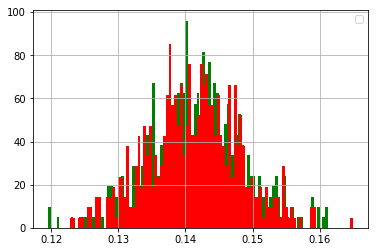

In [ ]:
a22['estimated_ate_se'].hist(bins = 100, density = True, color = 'green')
b22['estimated_ate_se'].hist(bins = 100, density = True, color = 'red')
plt.legend()

No handles with labels found to put in legend.


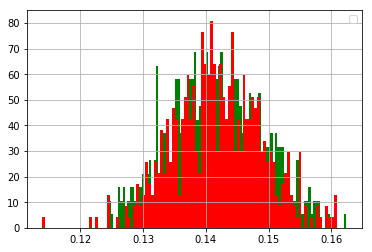

In [ ]:
a21['estimated_ate_se'].hist(bins = 100, density = True, color = 'green')
b21['estimated_ate_se'].hist(bins = 100, density = True, color = 'red')
plt.legend()

No handles with labels found to put in legend.


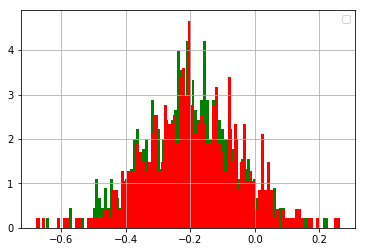

In [ ]:
a22['estimated_ate'].hist(bins = 100, density = True, color = 'green')
b22['estimated_ate'].hist(bins = 100, density = True, color = 'red')
plt.legend()

No handles with labels found to put in legend.


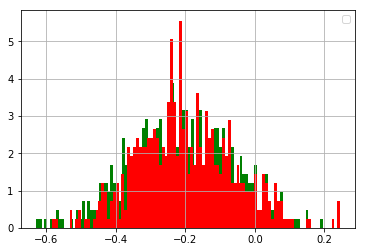

In [ ]:
a21['estimated_ate'].hist(bins = 100, density = True, color = 'green')
b21['estimated_ate'].hist(bins = 100, density = True, color = 'red')
plt.legend()

##6

In [ ]:
def gen_shoe_data(N, block=False, person_variability=5):

  # Make N people each with their own randomly wear rate in [0, person_variability].
  people = np.arange(0, N)
  r_person = np.random.uniform(0, person_variability, size=N)
  
  # Make left and right feet
  df_left = pd.DataFrame({'i': people})
  df_left['left_foot'] = 1
  df_right = pd.DataFrame({'i': people})
  df_right['left_foot'] = 0 
  df = pd.concat([df_left, df_right], axis=0)
  df = pd.concat([df_left, df_right], axis=0)
  df = pd.concat([df_left, df_right], axis=0)
  df = pd.concat([df_left, df_right], axis=0)
  df = pd.concat([df_left, df_right], axis=0)
  df['shoe'] = np.arange(0, df.shape[0])
  
  # Each of the person's feet will have the same Y0 (success probability)
  df['r_y0'] = r_person[df['i']]
  
  # Treatment reduces wear rate by 0.20
  ATE = -0.20
  # Y outcomes are measures of shoe wear
  Y0 = np.random.normal(loc=df['r_y0'])
  Y1 = np.random.normal(loc=df['r_y0'] + ATE)
  df['y0'] = Y0
  df['y1'] = Y1
  
  P_treatment = 0.5
  if block == False:
    treatment_shoes = np.random.choice(df['shoe'], int(len(df['shoe']) * P_treatment), replace=False)
    df['d'] = df['shoe'].isin(treatment_shoes).astype('float')
  else:
    # Treat left foot only
    # In real life we would treat a random foot.
    # Wouldn't do this in real life but it doesn't matter for the simulation.
    df['d'] = df['left_foot']
         
  df['y'] = df.eval("y1 * d + y0 * (1 - d)")
  del df['y0']
  del df['y1']
  return df

def estimate_ate(df):
  means = df.groupby('d')['y'].mean()
  return {'estimated_ate': means[1] - means[0]}


def regression_ate(df, formula="y ~ d + r_y0"):
  r = sfa.ols(formula, df).fit()
  return {
      'estimated_ate': r.params['d'],
      'estimated_ate_se': r.bse['d']
  }

In [ ]:
B = 500
inter_person_variability = 20
# Generate simulated data sets without blocking and with blocking
noblock1 = [gen_shoe_data(20, False, inter_person_variability) for _ in progressbar(np.arange(0, B))]
block1 = [gen_shoe_data(20, True, inter_person_variability) for _ in progressbar(np.arange(0, B))]
# Estimate the ATE of each data set
m_noblock1 = pd.DataFrame([estimate_ate(d) for d in progressbar(noblock1)])
m_block1 = pd.DataFrame([estimate_ate(d) for d in progressbar(block1)])
# Show results
results = pd.concat([
    m_noblock1['estimated_ate'].describe(),
    m_block1['estimated_ate'].describe()
], axis=1)
results.columns = ['noblock', 'block']
results

100% (500 of 500) |######################| Elapsed Time: 0:00:07 Time:  0:00:07
100% (500 of 500) |######################| Elapsed Time: 0:00:06 Time:  0:00:06
100% (500 of 500) |######################| Elapsed Time: 0:00:01 Time:  0:00:01
100% (500 of 500) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


,noblock,block
count,500.000000,500.000000
mean,-0.213726,-0.211386
std,1.862440,0.305815
min,-5.305466,-1.111531
25%,-1.525726,-0.408049
50%,-0.154956,-0.224399
75%,0.928169,0.005594
max,6.212837,0.826867


In [ ]:
m_noblock1 = pd.DataFrame([regression_ate(d, "y~d+C(i)") for d in progressbar(noblock1)])
m_noblock1.describe()

100% (500 of 500) |######################| Elapsed Time: 0:00:07 Time:  0:00:07


,estimated_ate,estimated_ate_se
count,500.000000,500.000000
mean,-0.201915,0.448095
std,0.462198,0.094789
min,-1.495914,0.220221
25%,-0.526280,0.382364
50%,-0.182086,0.441377
75%,0.088735,0.503351
max,1.463598,0.794321


In [ ]:
m_block1 = pd.DataFrame([regression_ate(d, "y~d+C(i)") for d in progressbar(block1)])
m_block1.describe()

100% (500 of 500) |######################| Elapsed Time: 0:00:07 Time:  0:00:07


,estimated_ate,estimated_ate_se
count,500.000000,500.000000
mean,-0.211386,0.312513
std,0.305815,0.052608
min,-1.111531,0.181971
25%,-0.408049,0.277723
50%,-0.224399,0.314055
75%,0.005594,0.346586
max,0.826867,0.464395


#Problem 1
##2

In [ ]:
def newfunction2(
  N = 10000,
  beta_hs = 0.35,
  ATE = 0.032
):
  grad_high_school = np.random.binomial(n=1, p=0.5, size=N)
  D = np.random.binomial(n=1, p=0.61, size=N)
  baseline_probability = 0.25 + beta_hs * grad_high_school
  Y0 = np.random.binomial(n=1, p=baseline_probability)
  Y1 = np.random.binomial(n=1, p=baseline_probability + ATE * D)
  dff = pd.DataFrame({
    'grad_high_school': grad_high_school,
    'd': D,
    'y0': Y0,
    'y1': Y1
  })
  dff['y'] = dff.eval("y1 * d + y0 * (1 - d)")
  return dff

In [ ]:
B=1000
pvalues1 = []

for i in progressbar(np.arange(0, B)):
  sample = newfunction2(N = 13560, beta_hs = .35, ATE = 0.018)
  model1 = sfa.ols(formula='y ~ d', data=sample).fit()
  pvalues1.append(model1.pvalues.d)

pvalues1 = pd.Series(pvalues1)
stpower = (pvalues1 < .05).mean()
print("statistical power Model 1= ", stpower)



100% (1000 of 1000) |####################| Elapsed Time: 0:00:34 Time:  0:00:34


statistical power Model 1=  0.569


In [ ]:
#Model 2
pvalues2= []

for i in progressbar(np.arange(0, B)):
  sample = newfunction2(N = 13560, beta_hs = .35, ATE = .018)
  model2 = sfa.ols(formula='y ~ d + grad_high_school', data=sample).fit()
  pvalues2.append(model2.pvalues.d)

pvalues2 = pd.Series(pvalues2)
stpower2 = (pvalues2 < .05).mean()
print("statistical power Model 2= ", stpower2)

100% (1000 of 1000) |####################| Elapsed Time: 0:00:42 Time:  0:00:42


statistical power Model 2=  0.573


##3

In [ ]:
B=1000
pvalues1 = []

for i in progressbar(np.arange(0, B)):
  sample = newfunction2(N = 13560, beta_hs = .1, ATE = 0.018)
  model1 = sfa.ols(formula='y ~ d', data=sample).fit()
  pvalues1.append(model1.pvalues.d)

pvalues1 = pd.Series(pvalues1)
stpower = (pvalues1 < .05).mean()
print("new statistical power Model 1= ", stpower)



100% (1000 of 1000) |####################| Elapsed Time: 0:00:34 Time:  0:00:34


new statistical power Model 1=  0.595


In [ ]:
#Model 2
pvalues2= []

for i in progressbar(np.arange(0, B)):
  sample = newfunction2(N = 13560, beta_hs = .1, ATE = .018)
  model2 = sfa.ols(formula='y ~ d + grad_high_school', data=sample).fit()
  pvalues2.append(model2.pvalues.d)

pvalues2 = pd.Series(pvalues2)
stpower2 = (pvalues2 < .05).mean()
print(" new statistical power Model 2= ", stpower2)

100% (1000 of 1000) |####################| Elapsed Time: 0:00:41 Time:  0:00:41


 new statistical power Model 2=  0.619


#Problem 2
##1

In [ ]:
B=1000
list_noblock = []

for i in progressbar(np.arange(0, B)):
  sample = gen_shoe_data(N=100, block=False, person_variability=20)
  noblock2 = sfa.ols(formula='y ~ d', data=sample).fit()
  list_noblock.append(noblock2.pvalues.d)

list_noblock = pd.Series(list_noblock)
stpower_noblock = (list_noblock < .05).mean()
print("the statistical power of the non-blocking design = ", stpower_noblock)

100% (1000 of 1000) |####################| Elapsed Time: 0:00:26 Time:  0:00:26


the statistical power of the non-blocking design =  0.055


In [ ]:
B=1000
list_block = []

for i in progressbar(np.arange(0, B)):
  sample = gen_shoe_data(N=100, block=False, person_variability=20)
  block2 = sfa.ols(formula='y ~ d + r_y0', data=sample).fit()
  list_block.append(block2.pvalues.d)

list_block = pd.Series(list_block)
stpower_block = (list_block < .05).mean()
print("the statistical power of the blocking design = ", stpower_block)

100% (1000 of 1000) |####################| Elapsed Time: 0:00:30 Time:  0:00:30


the statistical power of the blocking design =  0.271


#Bonus

In [ ]:
B=5000

list_noblock = []

for i in progressbar(np.arange(0, B)):
  sample = gen_shoe_data(N=100, block=False, person_variability=20)
  noblock3 = sfa.ols(formula='y ~ d', data=sample).fit()
  list_noblock.append(noblock3.pvalues.d)

list_noblock = pd.Series(list_noblock)
stpower_noblock = (list_noblock < .05).mean()
print("the statistical power of the non-blocking design = ", stpower_noblock)

100% (5000 of 5000) |####################| Elapsed Time: 0:02:14 Time:  0:02:14


the statistical power of the non-blocking design =  0.0588


In [ ]:
B = 5000
list_block = []

for i in progressbar(np.arange(0, B)):
  sample = gen_shoe_data(N=100, block=True, person_variability=20)
  block3 = sfa.ols(formula='y ~ d + r_y0', data=sample).fit()
  list_block.append(block3.pvalues.d)

list_block = pd.Series(list_block)
stpower_block = (list_block < .05).mean()
print("the statistical power of the blocking design = ", stpower_block)

100% (5000 of 5000) |####################| Elapsed Time: 0:02:31 Time:  0:02:31


the statistical power of the blocking design =  0.2946
